### **Más allá de la linealidad**
Este articulo nace de una clase que tuve recientemente en mis estudios de maestría en ciencias de datos y analítica, fue una clase de esas que te dejan con una sensación de ¡Eureka! cuando por fin puedes unir todos los puntos y las cosas comienzan a tener sentido. Lo que más recuerdo es la frase **Hay vida fuera de la linealidad**. Una frase sencilla con mucho peso.

Normalmente, en las ciencias y en todas las areas que estan permeadas por la estadística y la probabilidad se consideran distribuciones normales o relaciones lineales, ya que estas son más fáciles de modelar y de interpretar. Sin embargo, en la realidad es muy poco común observar datos que se comporten de manera lineal o distribuciones que pertenezcan a una normal. Por lo tanto, muchos de los conceptos aprendidos son validos solamente bajo unas estrictas restricciones que muchas veces no son realistas en el mundo real. Tal vez es debido a esto que existe un gap entre la investigacion, el mundo academico y el mundo laboral o tecnico, donde la realidad no se asemeja a las simulaciones y es dificil implementar restricciones o controles a nuestros datos. Y es que no vivimos en un mundo lineal, vivimos en un mundo muchas veces impredesible con relaciones complejas y con muchas cosas más allá de las que podemos observar en un pricipio, por eso es peligroso asumir que nuestros datos van a ser lineales, cuando provienen de un mundo que no lo es. Aquí es donde entra el trabajo crucial de la estadística no paramétrica, que como su nombre lo indica, deja atrás el soporte sobre parametros que muchas veces desconocemos y no podemos estimar para darnos tecnicas y resultados que se pueden usar en situaciones con informacion compleja.

Para ilustrar los peligros de confiar demasiado en la linealidad quiero utilizar el espacio de la correlacion. La correlacion se define como la relación existente entre dos fenomenos o acciones. Por ejemplo, si observamos que en niños a mayor edad aumenta su estatura podemos decir que hay una correlacion entre la edad y la estatura y además que es una correlación positiva, ya que ambos fenómenos o variables como las llamaremos de aqui en adelante van en la misma dirección, es decir, si una aumenta la otra hace lo mismo. Por otro lado, si observamos que a mayor altura sobre el nivel del mar el clima es más frio podemos decir que hay una correlacion negativa entre la altura sobre el nivel del mar y la temperatura, ya que si una aumenta la otra disminuye. No obstante es importante diferenciar la correlacion de la causalidad, no hay ejemplo que lo muestre mejor, en verano el numero de ataques de tiburon y la venta de helados tienen una correlacion positiva muy alta. Lo que nos puede llevar a pensar que es peligroso comer helado en verano, no vaya a ser que el postre terminemos siendo nostros. Sin embargo, no es que realmente los helados causen los ataques de tiburon, sino que existe una **variable de confusion**: la temperatura, a mayor temperatura las personas tienden a consumir cosas frias y refrescantes como el helado, pero tambien tienden a ir a lugares donde puedan refrescarse, como la playa. De esta manera, estos casos que tienen una correlacion alta no tienen una relacion de causalidad, pero este es un tema muy interesante para otro post. 

Volviendo a la correlación, en estadistica cuando hablamos de correlacion normalmente nos referimos al coeficiente de correlación de pearson. Este nos dice numericamente la relación lineal existente entre dos variables en un rango de [-1, 1] donde -1 significa una correlación negativa alta y 1 significa una correlación positiva alta y los numeros cercanos a ceros una correlacion debil o nula. Sin emabrgo, hay algo importante aqui, la palabra **lineal** si obtenemos un coeficiente de correlacion de pearson de 0 solo podemos afirmar que no existe una correlacion lineal entre las dos variables, sin embargo, este coeficiente falla en identificar correlaciones de otro tipo, que como mencionamos antes son infinitas y mucho más probables. Qué debemos hacer entonces? Conocer que existen otras opciones más robustas para definir la correlación de nuestras variables, como lo son el coeficiente de correlacion de kendall y el de spearman. 

Vamos a ilustrar esto con ejemplos. 

Si generamos artificialmente dos variables perfectamente correlacionadas, X y Y, sabemos de antemano que su coeficiente debe ser uno, dado que nosotros las hemos creado. Pero veamos que nos dicen los distintos coeficientes de correlacion: 

Coeficiente de pearson: 1.0
Coeficiente de kendall: 1.0
Coeficiente de spearman: 1.0


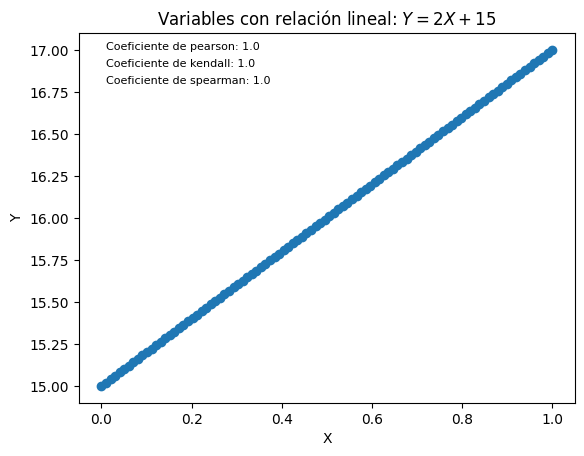

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

X = np.linspace(0,1,100)
Y = X*2 +15
k = np.round(stats.kendalltau(X, Y).statistic,1)
p = np.round(stats.pearsonr(X,Y).statistic,1)
s = np.round(stats.spearmanr(X,Y).statistic,1)

plt.plot(X,Y,'o');
plt.xlabel("X");
plt.ylabel("Y");
plt.title("Variables con relación lineal: $Y = 2X + 15$")

plt.text(0.01,17,f"Coeficiente de pearson: {p}", fontsize=8 )
plt.text(0.01,16.9,f"Coeficiente de kendall: {k}", fontsize=8 )
plt.text(0.01,16.8,f"Coeficiente de spearman: {s}", fontsize=8 )

print(f"Coeficiente de pearson: {p}")
print(f"Coeficiente de kendall: {k}")
print(f"Coeficiente de spearman: {s}")

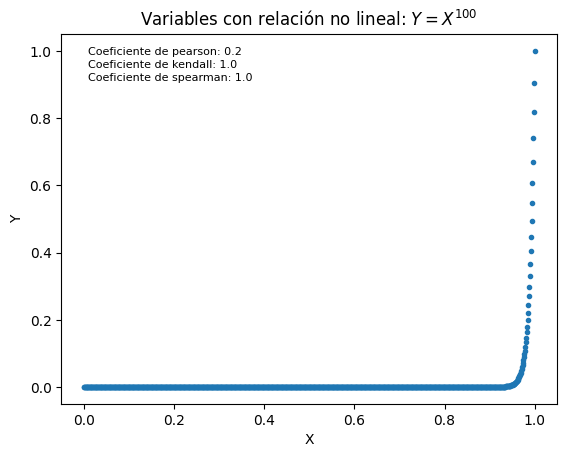

In [95]:
X = np.linspace(0 , 1, 1000)
Y = np.power(X, 100) 

k = np.round(stats.kendalltau(X, Y).statistic,1)
p = np.round(stats.pearsonr(X,Y).statistic,1)
s= np.round(stats.spearmanr(X,Y).statistic,1)

plt.plot(X,Y,'.');
plt.xlabel("X");
plt.ylabel("Y");
plt.title("Variables con relación no lineal: $Y = X^{100}$")

plt.text(0.01,0.99,f"Coeficiente de pearson: {p}", fontsize=8 )
plt.text(0.01,0.95,f"Coeficiente de kendall: {k}", fontsize=8 )
plt.text(0.01,0.91,f"Coeficiente de spearman: {s}", fontsize=8 );


Coeficiente de pearson: 1.0
Coeficiente de kendall: 0.4
Coeficiente de spearman: 0.6


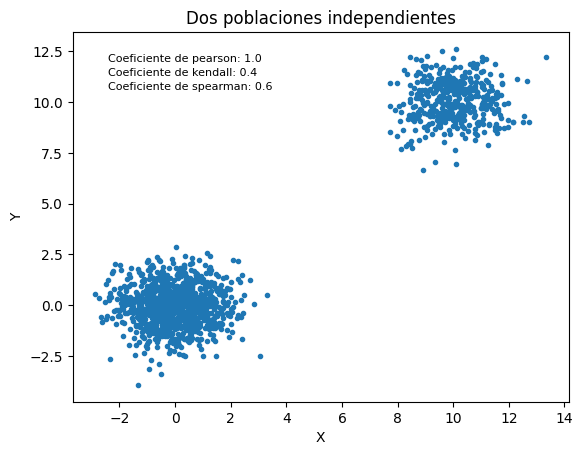

In [107]:
#Creamos dos poblaciones independientes y vemos su correlación
X1= np.random.randn(1000,2)
X2 = 10 + np.random.randn(400,2)
X = np.vstack((X1,X2))
x,y= X[:,0],X[:,1]

k = np.round(stats.kendalltau(x, y).statistic,1)
p = np.round(stats.pearsonr(x,y).statistic,1)
s = np.round(stats.spearmanr(x,y).statistic,1)

plt.plot(x, y, ".");
plt.xlabel("X");
plt.ylabel("Y");
plt.title("Dos poblaciones independientes")

plt.text(-2.4,12,f"Coeficiente de pearson: {p}", fontsize=8 )
plt.text(-2.4,11.3,f"Coeficiente de kendall: {k}", fontsize=8 )
plt.text(-2.4,10.6,f"Coeficiente de spearman: {s}", fontsize=8 )


In [42]:
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
res

R-squared: 0.909726


LinregressResult(slope=0.9502243904616293, intercept=0.08086115323940701, rvalue=0.953795403654723, pvalue=0.0, stderr=0.008005703377336807, intercept_stderr=0.04385000019001149)

Text(0.1, 92, 'Coeficiente de spearman: 0.03')

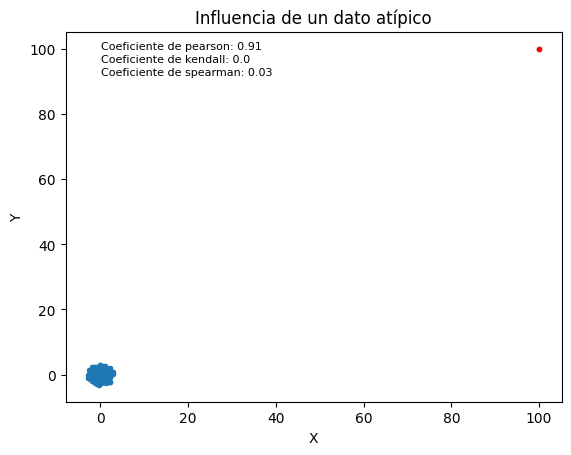

In [124]:
#Y que pasa con los datos atipicos?
X1= np.random.randn(1000,2)
X = np.vstack((X1,[100,100]))
                            
k = np.round(stats.kendalltau(X[:,0], X[:,1]).statistic,1)
p = np.round(stats.pearsonr(X[:,0],X[:,1]).statistic,2)
s = np.round(stats.spearmanr(X[:,0],X[:,1]).statistic,2)

plt.plot(X[:,0], X[:,1], ".");
plt.plot(100, 100, ".r");

plt.xlabel("X");
plt.ylabel("Y");
plt.title("Influencia de un dato atípico")
plt.text(0.1,100,f"Coeficiente de pearson: {p}", fontsize=8 )
plt.text(0.1,96,f"Coeficiente de kendall: {k}", fontsize=8 )
plt.text(0.1,92,f"Coeficiente de spearman: {s}", fontsize=8 );


**Ipyvizzu**

In [44]:
	import pandas as pd

	from ipyvizzu import Chart, Data, Config, Style

	 

	data_frame = pd.read_csv(

	    "https://ipyvizzu.vizzuhq.com/0.15/assets/data/chart_types_eu.csv",

	    dtype={"Year": str, "Timeseries": str},

	)

	data = Data()

	data.add_data_frame(data_frame)

	 

	chart = Chart()

	chart.animate(data)

	chart.animate(

	    Config(

	        {

	            "channels": {

	                "x": "Value 6 (+/-)",

	                "y": "Value 5 (+/-)",

	                "noop": "Year",



	            },

	            "title": "Scatter Plot",

	            "geometry": "circle",

	        }

	    )

	)


In [45]:
data_frame

,Country_code,Country,Joy factors,Year,Value 2 (+),Value 1 (+),Value 3 (+),Value 5 (+/-),Value 4 (+/-),Value 6 (+/-),index
0,AT,Austria,Happiness,01,6,0.1122,8223696,-6,-0.1122,8223696,1
1,AT,Austria,Happiness,02,8,0.0918,64573220,-8,-0.0918,-64573220,1
2,AT,Austria,Happiness,03,16,0.0918,82882182,-16,0.0918,82882182,1
3,AT,Austria,Happiness,04,17,0.0969,94046233,17,-0.0969,-94046233,1
4,AT,Austria,Happiness,05,8,0.0918,3760493,8,0.0918,3760493,1
...,...,...,...,...,...,...,...,...,...,...,...
2347,UK,UK,Love,17,10,0.2707,215762904,10,-0.2707,-215762904,1
2348,UK,UK,Love,18,9,0.2162,212546353,9,-0.2162,212546353,1
2349,UK,UK,Love,19,7,0.2413,234952693,7,-0.2413,234952693,1
2350,UK,UK,Love,20,5,0.2121,16467320,5,0.2121,16467320,1


In [46]:
#Creamos dos poblaciones independientes y vemos su correlación
X1= np.random.randn(100,2)
X2 = 10 + np.random.randn(40,2)
dfX = pd.DataFrame()
dfX["X"] = X1[:,0]
dfX["Y"] = X1[:,1]
dfX["poblacion"] = "p1"
dfY = pd.DataFrame()
dfY["X"] = X2[:,0]
dfY["Y"] = X2[:,1]
dfY["poblacion"] = "p2"

df = pd.concat([dfX,dfY], axis=0)
df

,X,Y,poblacion
0,-0.703573,-2.026452,p1
1,0.919951,-0.222628,p1
2,-0.717196,-0.382061,p1
3,-0.323027,0.946271,p1
4,0.115515,1.302259,p1
...,...,...,...
35,7.865529,10.926091,p2
36,10.801162,10.079256,p2
37,8.774156,11.774922,p2
38,10.500698,10.708047,p2


In [47]:

data_p = Data()

data_p.add_data_frame(df)

    
chart_p = Chart()

chart_p.animate(data_p)

chart_p.animate(

    Config(

        {

            "channels": {

                "x": "X",

                "y": "Y",

                "noop": "poblacion",



            },

            "title": "Scatter Plot",

            "geometry": "circle",

        }

    )

)


In [48]:
	import pandas as pd

	from ipyvizzu import Chart, Data, Config, Style

	 

	data_frame = pd.read_csv(

	    "https://ipyvizzu.vizzuhq.com/0.15/assets/data/chart_types_eu.csv",

	    dtype={"Year": str, "Timeseries": str},

	)

	data = Data()

	data.add_data_frame(data_frame)

	 

	chart = Chart()

	chart.animate(data)

In [49]:
data_frame

,Country_code,Country,Joy factors,Year,Value 2 (+),Value 1 (+),Value 3 (+),Value 5 (+/-),Value 4 (+/-),Value 6 (+/-),index
0,AT,Austria,Happiness,01,6,0.1122,8223696,-6,-0.1122,8223696,1
1,AT,Austria,Happiness,02,8,0.0918,64573220,-8,-0.0918,-64573220,1
2,AT,Austria,Happiness,03,16,0.0918,82882182,-16,0.0918,82882182,1
3,AT,Austria,Happiness,04,17,0.0969,94046233,17,-0.0969,-94046233,1
4,AT,Austria,Happiness,05,8,0.0918,3760493,8,0.0918,3760493,1
...,...,...,...,...,...,...,...,...,...,...,...
2347,UK,UK,Love,17,10,0.2707,215762904,10,-0.2707,-215762904,1
2348,UK,UK,Love,18,9,0.2162,212546353,9,-0.2162,212546353,1
2349,UK,UK,Love,19,7,0.2413,234952693,7,-0.2413,234952693,1
2350,UK,UK,Love,20,5,0.2121,16467320,5,0.2121,16467320,1


In [50]:


	 

	chart.animate(

	    Config(

	        {

	            "channels": {

	                "x": ["Joy factors", "Value 6 (+/-)"],

	                "label": "Country_code",

	            },

	            "title": "Scatter Plot",

	        }

	    )

	)